In [2]:
# Import and configuration
import numpy as np
import os
import pandas as pd
import shared
import matplotlib.pyplot as plt

from config import *

In [3]:
# Load clean data from CSV
incident_data = pd.read_csv(incidents_clean_data_path)
incident_data.fillna("Unknown", inplace=True)
incident_data.count()

Year                        239677
State Name                  239677
Number of Killed            239677
Number of Injured           239677
Incident Info               239677
Latitude                    239677
Longitude                   239677
Participant Age             239677
Participant Age Group       239677
participant_gender          239677
Participant Relationship    239677
Participant Status          239677
Participant Type            239677
State Abbr                  239677
dtype: int64

In [4]:
# Your code for demography-related analysis starts here
new_data = {
    'Age Group': [],
    'Type': [],
    'Status': [],
    'Year': [],
    'State Name': []
}
for i,row in incident_data.head().iterrows():
    age_groups = shared.split_value(row['Participant Age Group'])
    types = shared.split_value(row['Participant Type'])
    statuses = shared.split_value(row['Participant Status'])
    for participant_index in age_groups:
        age_group = age_groups[participant_index]
        status = statuses[participant_index]
        part_type = types[participant_index]
        new_data['Age Group'].append(age_group)
        new_data['Type'].append(part_type)
        new_data['Status'].append(status)
        new_data['Year'].append(row['Year'])
        new_data['State Name'].append(row['State Name'])
        
new_data = pd.DataFrame(new_data)
new_data

,Age Group,Type,Status,Year,State Name
0,Adult 18+,Victim,Arrested,2013,Pennsylvania
1,Adult 18+,Victim,Injured,2013,Pennsylvania
2,Adult 18+,Victim,Injured,2013,Pennsylvania
3,Adult 18+,Victim,Injured,2013,Pennsylvania
4,Adult 18+,Subject-Suspect,Injured,2013,Pennsylvania
5,Adult 18+,Victim,Killed,2013,California
6,Adult 18+,Victim,Injured,2013,California
7,Adult 18+,Victim,Injured,2013,California
8,Adult 18+,Victim,Injured,2013,California
9,Adult 18+,Subject-Suspect,"Injured, Unharmed, Arrested",2013,Ohio


In [5]:
# Your code for demography-related analysis starts here
new_data = {
    'Age Group': [],
    'Type': [],
    'Year': [],
    'State Name': []
}
for i,row in incident_data.iterrows():
    age_groups = shared.split_value(row['Participant Age Group'])
    types = shared.split_value(row['Participant Type'])
    for participant_index in age_groups:
        age_group = age_groups[participant_index]
        part_type = types[participant_index]
        new_data['Age Group'].append(age_group)
        new_data['Type'].append(part_type)
        new_data['Year'].append(row['Year'])
        new_data['State Name'].append(row['State Name'])
    
new_data = pd.DataFrame(new_data)
new_data

,Age Group,Type,Year,State Name
0,Adult 18+,Victim,2013,Pennsylvania
1,Adult 18+,Victim,2013,Pennsylvania
2,Adult 18+,Victim,2013,Pennsylvania
3,Adult 18+,Victim,2013,Pennsylvania
4,Adult 18+,Subject-Suspect,2013,Pennsylvania
5,Adult 18+,Victim,2013,California
6,Adult 18+,Victim,2013,California
7,Adult 18+,Victim,2013,California
8,Adult 18+,Victim,2013,California
9,Adult 18+,Subject-Suspect,2013,Ohio


In [7]:
suspect_age_groups = new_data.loc[new_data["Type"] == "Subject-Suspect"]
adult_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Adult 18+"]
adult_suspect_count = adult_suspect_age_groups['State Name'].value_counts()
teen_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Teen 12-17"]
teen_suspect_count = teen_suspect_age_groups['State Name'].value_counts()
child_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Child 0-11"]
child_suspect_count = child_suspect_age_groups['State Name'].value_counts()

suspect_df = pd.DataFrame({"Adult 18+ Shooters":adult_suspect_count,
                "Teen 12-17 Shooters":teen_suspect_count,
                  "Child 0-11 Shooters":child_suspect_count})

suspect_df.fillna("0", inplace=True)
suspect_df

,Adult 18+ Shooters,Teen 12-17 Shooters,Child 0-11 Shooters
Alabama,3531,263,16
Alaska,970,57,5
Arizona,1438,73,11
Arkansas,1980,151,11
California,10375,712,17
Colorado,1930,178,9
Connecticut,2312,140,1
Delaware,1065,108,1
District of Columbia,1399,81,2
Florida,9162,992,35


Text(0,0.5,'State')

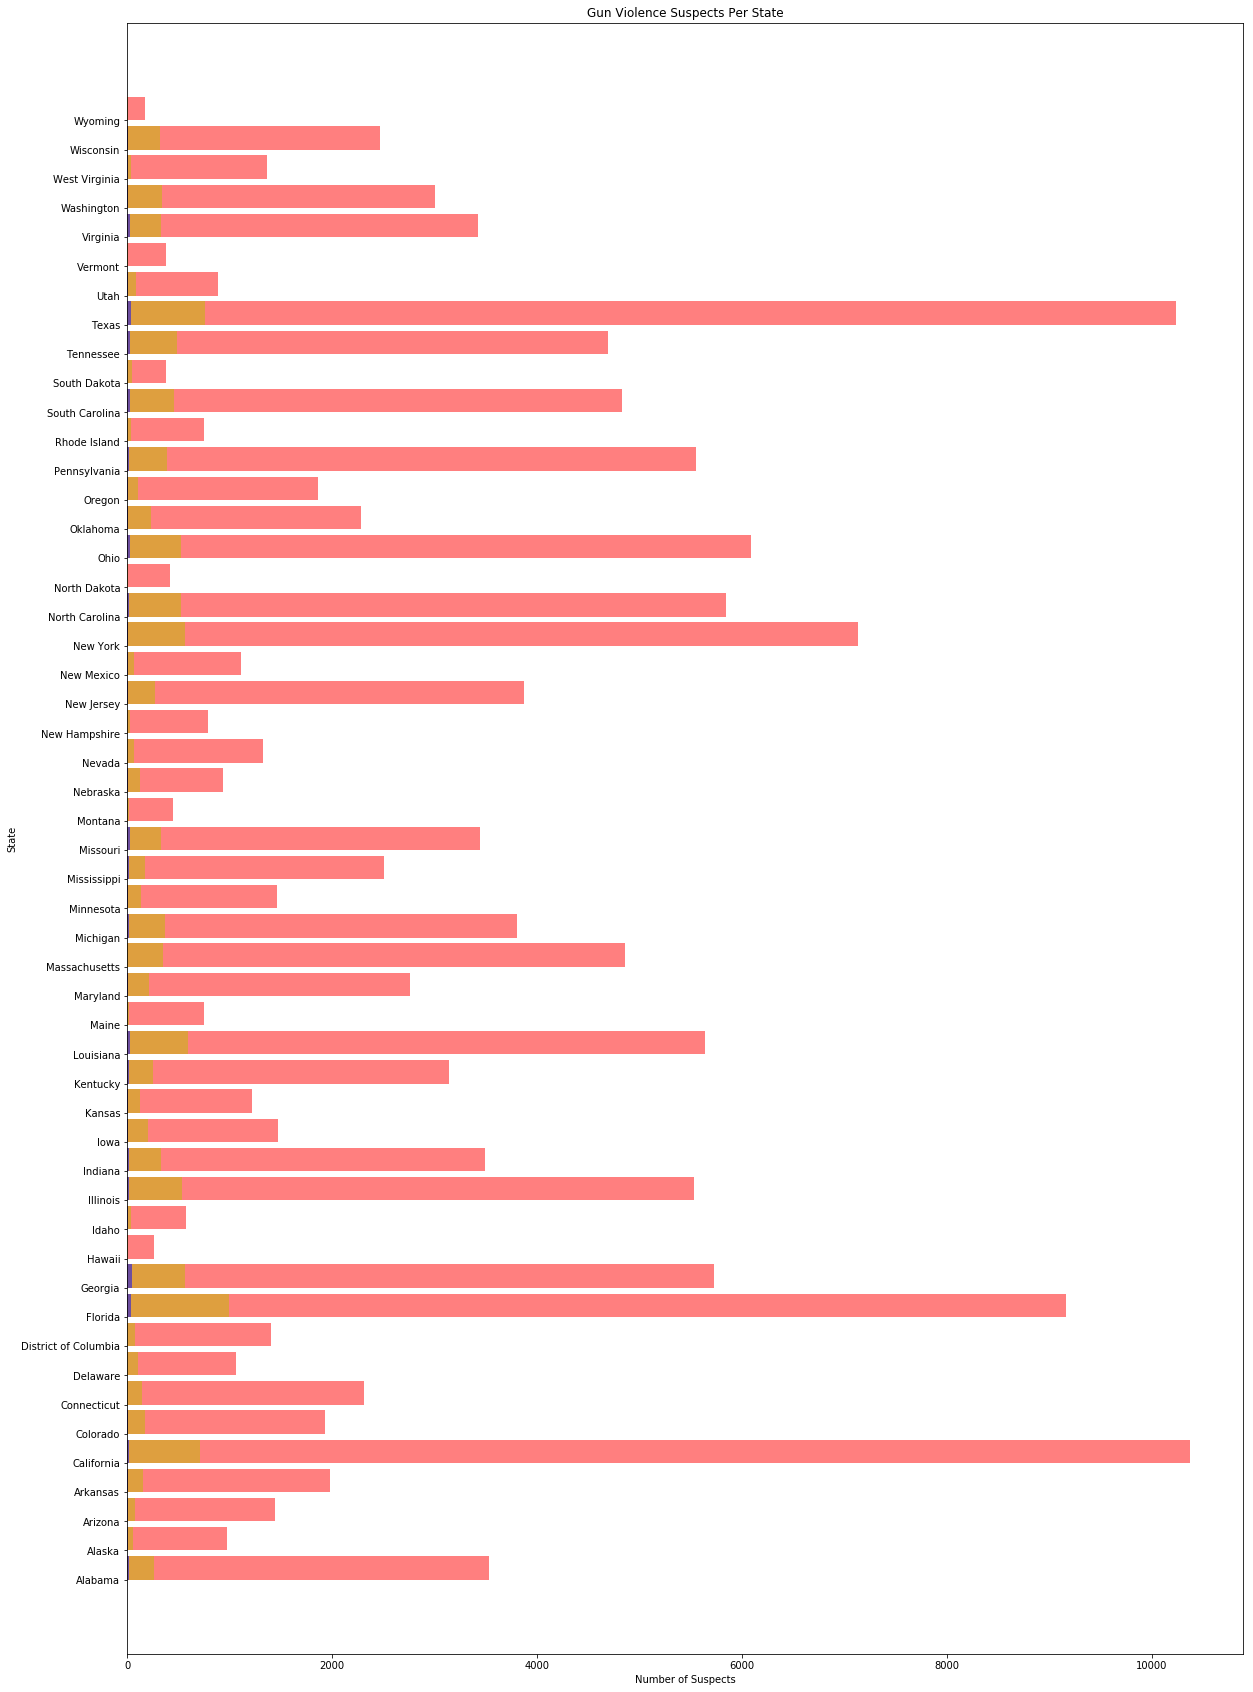

In [212]:
plt.figure(figsize=(20,30))
plt.barh(suspect_df.index, suspect_df['Adult 18+ Shooters'], color='r', alpha=0.5, align="edge")
plt.barh(suspect_df.index, suspect_df['Teen 12-17 Shooters'], color='y', alpha=0.5, align="edge")
plt.barh(suspect_df.index, suspect_df['Child 0-11 Shooters'], color='b', alpha=0.5, align="edge")
plt.title("Gun Violence Suspects Per State")
plt.xlabel("Number of Suspects")
plt.ylabel("State")

In [55]:
victim_age_groups = new_data.loc[new_data["Type"] == "Victim", :]
victim_age_groups_nm = victim_age_groups['Age Group'].value_counts()
victim_df = pd.DataFrame(victim_age_groups_nm)

victim_df

,Age Group
Adult 18+,149544
Teen 12-17,12343
Child 0-11,3894
